# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#to be able to create visuals we need to import the matplotlib.pyplot library

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

              item_name  quantity
17         Chicken Bowl       761
18      Chicken Burrito       591
25  Chips and Guacamole       506
39        Steak Burrito       386
10    Canned Soft Drink       351


<function matplotlib.pyplot.show(close=None, block=None)>

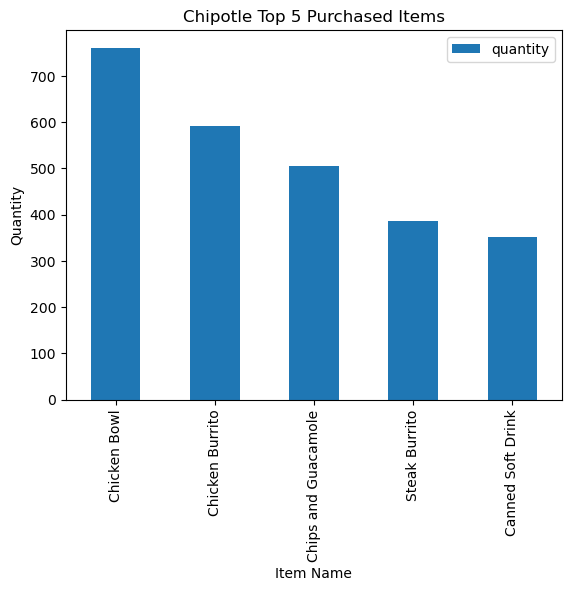

In [4]:
sum_chipo = chipo.groupby(['item_name'], as_index=False)['quantity'].sum()
#create a varialble to group the data by the name of the item ordered
#stop it from setting it as the index by making it false
#specify by which specific column you want to sum, in this case "quantity"
top_chipo=sum_chipo.sort_values(by=['quantity'],ascending=False).head(5)
#to get the top five ordered items, sort in descending order and get the top 5 
print(top_chipo)
#by printing we can see the values and item names obtained

top_chipo.plot(kind='bar')
#now to plot the histogram we chose the kind as bar
plt.xticks(range(len(top_chipo.index)), top_chipo.item_name)
#to get the x axis to show the item name rather than the index column
#set the xticks to item_name for the length of the index
plt.title("Chipotle Top 5 Purchased Items")
#to add a tittle to the graph
plt.xlabel('Item Name')
#to label the x axis
plt.ylabel("Quantity")
#to label the y axis
plt.show
#to show the table

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

C:\Users\nvbel\AppData\Local\Temp\ipykernel_45296\716932336.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  num_order = chipo.groupby("order_id")["quantity", "item_price"].sum()


Text(0, 0.5, 'Quantity of Items')

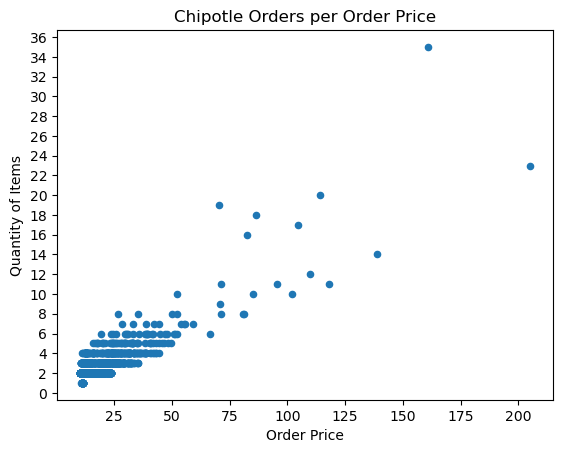

In [5]:
chipo.item_price = [float(price[1:-1]) for price in chipo.item_price]
#to strip the $ sign from the price column
num_order = chipo.groupby("order_id")["quantity", "item_price"].sum() 
#here we can calculate the number of items per order by grouping and adding up

num_order.plot(kind = "scatter", x = "item_price", y = "quantity")
#now we plot using the kind scatter and specifyning which values will be x and y
#if you wish to asjust the deimsion of the graph, use figsize=(l,h)
plt.locator_params ('y', nbins = 20)
#you can adjust the axis scale/increments by adjusting the nbins value
plt.title("Chipotle Orders per Order Price")
plt.xlabel("Order Price")
plt.ylabel("Quantity of Items")